In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
#import seaborn as sns
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
# charger les données 
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
digits['data'].shape

(1797, 64)

In [4]:
digits['data'].shape
dig = pd.DataFrame(digits['data'][0:1700])
dig.head(10)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [5]:
X = digits.data 
# data contient les images sous forme de tableaux de 8 x 8 = 64 couleurs de pixel en niveau de gris, 
#c'est-à-dire que la couleur de chaque pixel est représentée par un nombre entre 0 et 16  
y = digits.target #target qui contient les annotations (de 0 à 9) correspondant à la valeur "lue" du chiffre.
print(X.shape)
y

(1797, 64)


array([0, 1, 2, ..., 8, 9, 8])

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5) #fixer l'aléatoire
print ('Train Set :', X_train.shape)
print ('Test Set :', X_test.shape)

Train Set : (1437, 64)
Test Set : (360, 64)


0.9833333333333333


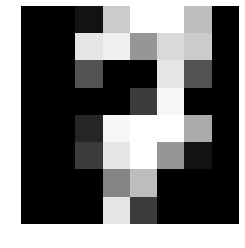

array([4])

In [7]:
from sklearn.neighbors import KNeighborsClassifier
# Entraînement du modele 
model = KNeighborsClassifier(n_neighbors=5) # n_neighbors est un hyperparamètre
model.fit(X_train, y_train) 
#print(model.score(X_train, y_train) )
print(model.score(X_test, y_test) )
#Test du modele 
test = digits['images'][100].reshape(1, -1) 

plt.imshow(digits['images'][300], cmap = 'Greys_r') 
plt.axis('off')
plt.show()
model.predict(test)

(360, 64)


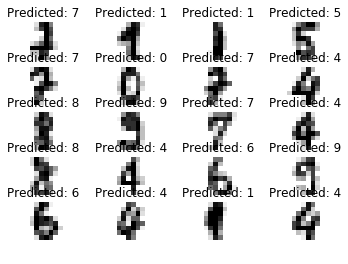

In [8]:
# On récupère les prédictions sur les données test
predicted = model.predict(X_test)
print(X_test.shape)
# On redimensionne les données sous forme d'images
images = X_test.reshape((-1, 8, 8))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=20)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(5,4)

for index, value in enumerate(select):
    plt.subplot(5,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()